In [1]:
import numpy as np
import gc
import matplotlib.pyplot as plt
from sklearn_sfa_master.sksfa import HSFA
from sklearn.preprocessing import StandardScaler

In [32]:
data = np.load('data/data_squareRoom.npy')
crop_h = 20
crop_w = 10
dim_step= 1
data = data[:, crop_h:-crop_h, crop_w:-crop_w][:, ::dim_step][:, :, ::dim_step]
gc.collect()
print(data.shape)

In [ ]:
images = [x.flatten() for x in data[:1000]]
scaler = StandardScaler()
images = data[:500]

n_samples = 1000
image_width, image_height = 190, 30
dimension = image_width * image_height

layer_configurations = [(5, 5, 5, 5, 4, 1)]
hsfa = HSFA(3, images.shape[1:], layer_configurations, noise_std=0.1)
hsfa = hsfa.fit(images)
slow_features = hsfa.transform(images)

Error: Session cannot generate requests

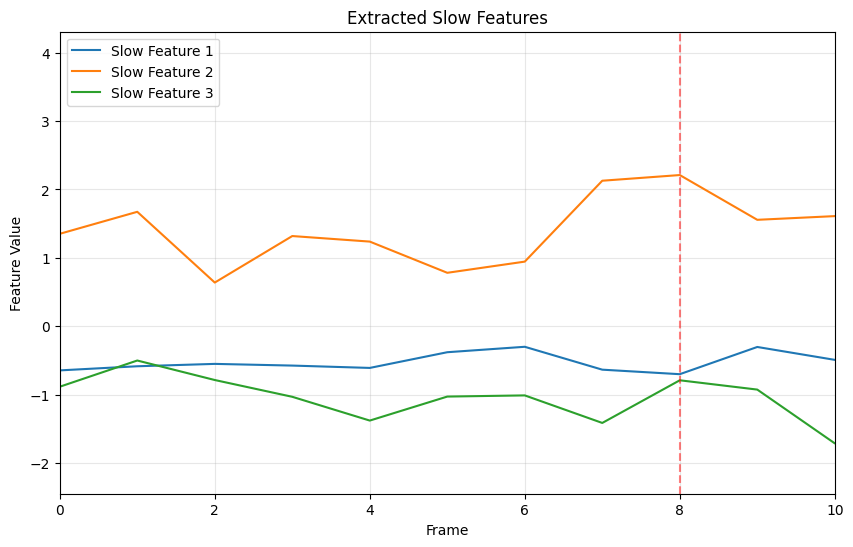

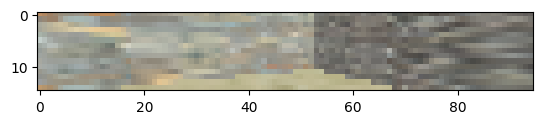

In [31]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

index = 8

ax.plot(slow_features[:, 0], label="Slow Feature 1")
ax.plot(slow_features[:, 1], label="Slow Feature 2")
ax.plot(slow_features[:, 2], label="Slow Feature 3")
ax.legend()
ax.grid(alpha=.3)
hline = ax.axvline(index, c='r', alpha=.5, linestyle='--')
plt.title("Extracted Slow Features")
plt.xlabel("Frame")
plt.ylabel("Feature Value")
plt.xlim(0,10)

plt.figure()
plt.imshow(data[index])
plt.show()